# Comprehensive Data Cleaning and Preprocessing Pipeline in Python

## Imported Libraries:
### pandas as pd
#### ✔️ Used for data manipulation and loading the CSV file (pd.read_csv, dataset.info(), etc.).

### numpy as np
#### ✔️ Used for numerical operations like calculating means, medians, and handling outliers (np.number, np.abs).

### seaborn as sns
#### ✔️ Used for visualizations, specifically the heatmaps for missing values and correlation matrices.

### matplotlib.pyplot as plt
#### ✔️ Used for plotting the heatmaps (plt.title(), plt.show()).

### from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
#### ✔️ Used for:
##### - StandardScaler and MinMaxScaler in the scale_data() function.
##### - LabelEncoder in the encode_categorical() function.


Dataset loaded successfully with shape: (205, 11)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       205 non-null    int64  
 1   Age              185 non-null    float64
 2   Gender           205 non-null    object 
 3   AnnualIncome     174 non-null    float64
 4   SpendingScore    205 non-null    int64  
 5   Membership       205 non-null    object 
 6   Country          205 non-null    object 
 7   JoinDate         205 non-null    object 
 8   Feedback         188 non-null    object 
 9   ConstantFeature  205 non-null    object 
 10  PurchaseAmount   192 non-null    float64
dtypes: float64(3), int64(2), object(6)
memory usage: 17.7+ KB
None

Summary Statistics:
       CustomerID         Age  AnnualIncome  SpendingScore  PurchaseAmount
count  205.000000  185.000000    174.000000     205.000000   

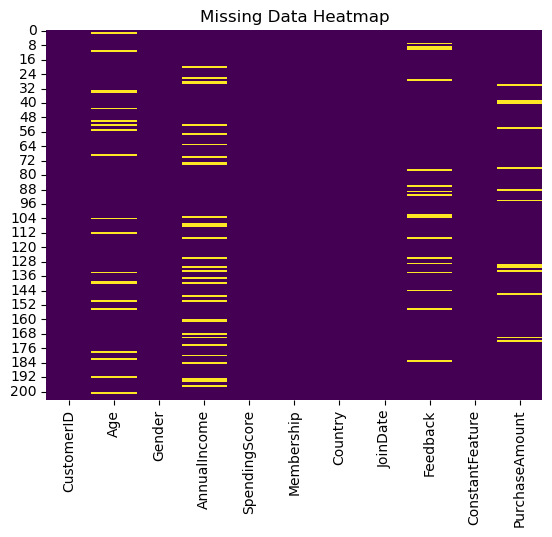


Missing values handled using method: mean

Duplicate Rows Found: 5

Duplicate rows removed.

Constant Features Found: ['ConstantFeature']

Outliers detected using IQR method:
Series([], dtype: int64)

Correlation Matrix:
                CustomerID       Age  AnnualIncome  SpendingScore  \
CustomerID        1.000000  0.059744      0.085112      -0.046480   
Age               0.059744  1.000000      0.077250       0.071522   
AnnualIncome      0.085112  0.077250      1.000000       0.010936   
SpendingScore    -0.046480  0.071522      0.010936       1.000000   
PurchaseAmount   -0.010130  0.086722     -0.051874       0.100524   

                PurchaseAmount  
CustomerID           -0.010130  
Age                   0.086722  
AnnualIncome         -0.051874  
SpendingScore         0.100524  
PurchaseAmount        1.000000  


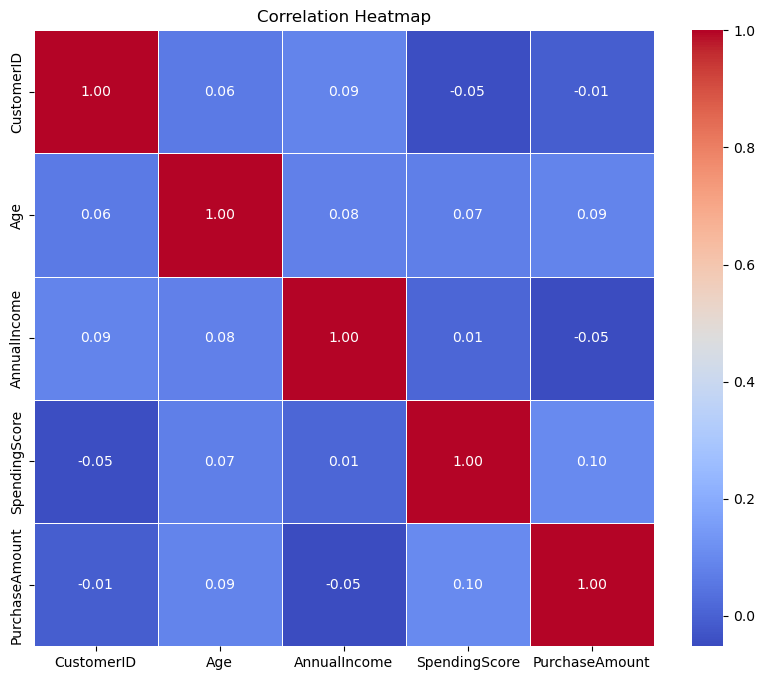


Categorical variables encoded.

Data scaled using standard method.

Final dataset shape after cleaning: (200, 11)


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Load Dataset
def load_dataset(filepath):
    """
    Load dataset from a CSV file.
    Args:
        filepath (str): Path to the CSV file.
    Returns:
        pd.DataFrame: Loaded dataset.
    """
    dataset = pd.read_csv(filepath)
    print(f"Dataset loaded successfully with shape: {dataset.shape}")
    return dataset

# Basic Information
def basic_info(dataset):
    """
    Display basic information about the dataset.
    Args:
        dataset (pd.DataFrame): The dataset to analyze.
    """
    print("\nDataset Information:")
    print(dataset.info())
    print("\nSummary Statistics:")
    print(dataset.describe())

# Check Missing Values
def check_missing_values(dataset):
    """
    Display missing values for all columns.
    Args:
        dataset (pd.DataFrame): The dataset to analyze.
    """
    missing_data = dataset.isnull().sum()
    missing_data = missing_data[missing_data > 0]
    if not missing_data.empty:
        print("\nMissing Values:")
        print(missing_data)
        sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
        plt.title('Missing Data Heatmap')
        plt.show()
    else:
        print("\nNo missing values found.")

# Handle Missing Values
def handle_missing_values(dataset, method='drop', fill_value=None):
    """
    Handle missing values by dropping or imputing.
    Args:
        dataset (pd.DataFrame): The dataset to clean.
        method (str): 'drop', 'mean', 'median', 'mode', or 'fill'.
        fill_value: Value to fill if method is 'fill'.
    Returns:
        pd.DataFrame: Cleaned dataset.
    """
    if method == 'drop':
        dataset = dataset.dropna()
    elif method in ['mean', 'median']:
        # Only apply to numeric columns
        numeric_cols = dataset.select_dtypes(include=[np.number]).columns
        if method == 'mean':
            dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())
        else:
            dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].median())
    elif method == 'mode':
        dataset = dataset.fillna(dataset.mode().iloc[0])
    elif method == 'fill' and fill_value is not None:
        dataset = dataset.fillna(fill_value)
    
    print(f"\nMissing values handled using method: {method}")
    return dataset


# Check Duplicates
def check_duplicates(dataset):
    """
    Check for duplicate rows in the dataset.
    Args:
        dataset (pd.DataFrame): The dataset to analyze.
    """
    duplicate_count = dataset.duplicated().sum()
    print(f"\nDuplicate Rows Found: {duplicate_count}")

# Remove Duplicates
def remove_duplicates(dataset):
    """
    Remove duplicate rows from the dataset.
    Args:
        dataset (pd.DataFrame): The dataset to clean.
    Returns:
        pd.DataFrame: Dataset without duplicates.
    """
    dataset = dataset.drop_duplicates()
    print("\nDuplicate rows removed.")
    return dataset

# Check Constant Features
def check_constant_features(dataset):
    """
    Identify constant features (columns with a single unique value).
    Args:
        dataset (pd.DataFrame): The dataset to analyze.
    """
    constant_features = [col for col in dataset.columns if dataset[col].nunique() == 1]
    if constant_features:
        print(f"\nConstant Features Found: {constant_features}")
    else:
        print("\nNo constant features found.")

# Detect Outliers
def detect_outliers(dataset, method='IQR'):
    """
    Detect outliers using IQR or Z-score methods.
    Args:
        dataset (pd.DataFrame): The dataset to analyze.
        method (str): 'IQR' or 'Z-score'.
    """
    # Select only numeric columns
    numeric_cols = dataset.select_dtypes(include=[np.number])
    
    if method == 'IQR':
        Q1 = numeric_cols.quantile(0.25)
        Q3 = numeric_cols.quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).sum()
    elif method == 'Z-score':
        from scipy.stats import zscore
        z_scores = np.abs(zscore(numeric_cols))
        outliers = (z_scores > 3).sum(axis=0)

    print(f"\nOutliers detected using {method} method:")
    print(outliers[outliers > 0])

# Correlation Analysis
def correlation_analysis(dataset):
    """
    Generate and visualize the correlation matrix.
    Args:
        dataset (pd.DataFrame): The dataset to analyze.
    """
    # Select only numeric columns
    numeric_data = dataset.select_dtypes(include=[np.number])
    
    if numeric_data.empty:
        print("\nNo numeric data available for correlation analysis.")
        return
    
    correlation_matrix = numeric_data.corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)
    
    # Visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()


# Encode Categorical Variables
def encode_categorical(dataset):
    """
    Encode categorical variables using label encoding.
    Args:
        dataset (pd.DataFrame): The dataset to encode.
    Returns:
        pd.DataFrame: Encoded dataset.
    """
    label_encoders = {}
    for col in dataset.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        dataset[col] = le.fit_transform(dataset[col].astype(str))
        label_encoders[col] = le
    print("\nCategorical variables encoded.")
    return dataset

# Normalize/Standardize Data
def scale_data(dataset, method='standard'):
    """
    Scale numerical data using standardization or normalization.
    Args:
        dataset (pd.DataFrame): The dataset to scale.
        method (str): 'standard' or 'minmax'.
    Returns:
        pd.DataFrame: Scaled dataset.
    """
    numerical_cols = dataset.select_dtypes(include=[np.number]).columns
    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])
    print(f"\nData scaled using {method} method.")
    return dataset

# Run the Full Data Cleaning Pipeline
def run_data_cleaning_pipeline(filepath):
    dataset = load_dataset(filepath)
    basic_info(dataset)
    check_missing_values(dataset)
    dataset = handle_missing_values(dataset, method='mean')
    check_duplicates(dataset)
    dataset = remove_duplicates(dataset)
    check_constant_features(dataset)
    detect_outliers(dataset)
    correlation_analysis(dataset)
    dataset = encode_categorical(dataset)
    dataset = scale_data(dataset, method='standard')
    print("\nFinal dataset shape after cleaning:", dataset.shape)
    return dataset

# Replace 'xyz.csv' with your dataset file path
cleaned_dataset = run_data_cleaning_pipeline(r'C:\Users\khaledeid\Box\KhaledEid\Data Science\Data Sets\customer_data.csv')
